# **Color Pop Effect (RGB Color Family)**
User can select a color family within red, green and blue to perform a pop effect. Pixels which belongs to another two color families will be turned into grayscale.

The RGB color code is in the format (R, G, B). Each parameter (R, G, and G) defines the intensity of the color as an integer between 0 and 255. For example. the RGB color code of red is (255,0,0). Every pixels in the image will be checked to identify which family the pixel belongs to. If the pixel has RGB Color code (241,45,85), that means the pixel falls under red color family. 

However, if the RGB color code is (65,174,26), that means it is under green color family. Therefore, the  RGB Color code will be modified by using formula below.




> 1. value = *(0.290 x R) + (0.587 x G) + (0.114 x B)*

> 2. new_RGB_code = (value, value, value)

### 1. Import necessary libraries

In [2]:
import os
import cv2
import numpy as np
import pandas as pd 
from PIL import Image
from google.colab.patches import cv2_imshow

### 2. Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 3. Set working path
The image will be uploaded to this path

In [4]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


### 4. Upload image file

In [5]:
from google.colab import files
uploaded = files.upload()
for key, value in uploaded.items():
  try:
    print(key, 'is successfully uploaded!')
  except:
    print('Your file is not successfully uploaded!')

Saving bg1.png to bg1 (1).png
bg1.png is successfully uploaded!


### 5. Display the uploaded image

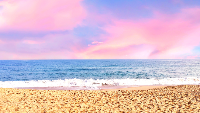

In [6]:
directory = os.getcwd()
img = cv2.imread('{0}/{1}'.format(directory,key))
cv2_imshow(img)

### 6. Create function for process bar
To monitor the progress of image processing

In [7]:
from IPython.display import HTML, display
import time

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

out = display(progress(0, 100), display_id=True)

### 7. Choose a color family to be kept
 
*   Pick a color family among red, green and blue
*   Another two color family will be turned into grayscale

In [8]:
color_dict = {'0': 'Blue', '1': 'Green', '2': 'Red'}
print('{0}\n{1}'.format(color_dict,'Fill in the blank with number only'))
color_picked = input("\nWhat color family to be shown? ")

print('{0} {1}'.format(color_dict[color_picked],'family is chosen to be shown.'))

{'0': 'Blue', '1': 'Green', '2': 'Red'}
Fill in the blank with number only

What color family to be shown? 0
Blue family is chosen to be shown.


### 8. Image Processing
This will take few minutes or more according to the size of image. 

In [11]:
height, width = img.shape[:2]
image_arr = np.zeros((height, width, 3), dtype=np.uint8)

for y_coor in range(0,height,1):
  for x_coor in range(0,width,1):
    #time.sleep(0.02)
    (b, g, r) = img[y_coor, x_coor] #image[y-coordinate, x-coordinate]
    max_rgb_value = max(b,g,r)
    max_rgb_index = [b,g,r].index(max_rgb_value)
    
    if int(color_picked) == int(max_rgb_index):
      image_arr[y_coor, x_coor] = [b, g, r] #[b,g,r]
    else:
      value = 0.299*r + 0.587*g + 0.114*b
      image_arr[y_coor, x_coor] = [value, value, value] #[b,g,r]
    out.update(progress(y_coor, height))

### 9. Display and save the processed image.
The output image will be saved to the same directory in Step 3..

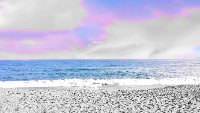

In [12]:
image_arr_final = cv2.cvtColor(image_arr, cv2.COLOR_BGR2RGB)
output = Image.fromarray(image_arr_final)
display(output)
output.save(key[:-4]+'_'+color_dict[color_picked]+'.png')